In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Generate unique random numbers
nums=list(range(100))
random.shuffle(nums)

X = np.array(nums).reshape(-1,1)          # feature so that it have 2d data becz sklearn needs samples and ffeatures like 2d matrix
# y = np.random.choice([0, 1], size=100)  # random 0 or 1
y = (X.flatten() > 50).astype(int)
print(nums)
print(y)


[42, 97, 52, 22, 17, 6, 13, 43, 76, 57, 73, 99, 4, 77, 48, 32, 5, 40, 1, 3, 31, 61, 41, 16, 93, 38, 54, 63, 70, 11, 46, 56, 53, 30, 59, 79, 96, 71, 34, 2, 35, 58, 26, 84, 12, 39, 66, 0, 89, 86, 49, 23, 47, 62, 33, 18, 8, 28, 7, 29, 14, 27, 94, 20, 72, 19, 25, 15, 68, 74, 10, 50, 98, 82, 88, 37, 69, 83, 64, 44, 45, 36, 55, 24, 95, 78, 75, 9, 80, 90, 87, 81, 65, 51, 92, 60, 21, 91, 85, 67]
[0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1]


In [109]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=34, stratify=y)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

# 3. Cross-validation on TRAIN data

model = LogisticRegression()
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=34)
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print(f"\nCross-validation accuracies (k={k}): {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

# 4. Train on full TRAIN set and test on HOLD-OUT TEST set

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Train size: 80
Test size: 20

Cross-validation accuracies (k=10): [1.    1.    1.    1.    1.    1.    0.875 1.    1.    1.   ]
Mean CV accuracy: 0.988 (+/- 0.037)



Final Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



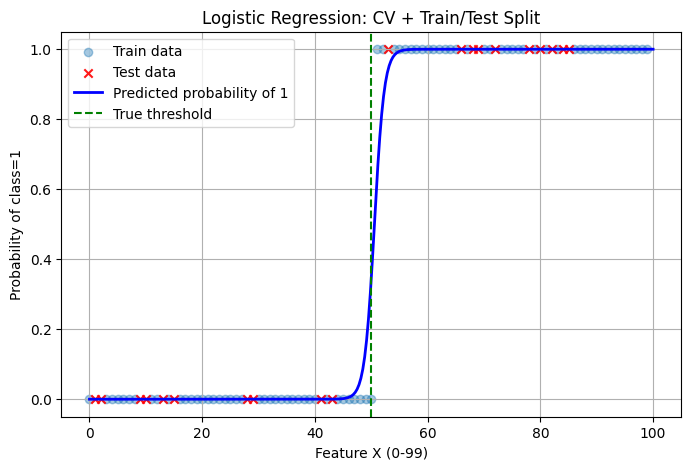

In [110]:
print("\nFinal Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

X_range = np.linspace(0, 100, 300).reshape(-1,1)  # match feature range
probs = model.predict_proba(X_range)[:,1]

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X_test, y_test, alpha=0.9, marker='x', color='red', label="Test data")
plt.plot(X_range, probs, color='blue', linewidth=2, label="Predicted probability of 1")
plt.axvline(50, color='green', linestyle="--", label="True threshold")
plt.xlabel("Feature X (0-99)")
plt.ylabel("Probability of class=1")
plt.title(f"Logistic Regression: CV + Train/Test Split")
plt.legend()
plt.grid(True)
plt.show()